# Version 1.1 RecModel Using Simple ANN's 

Import the Libs needed for the script.

In [1]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import keras
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Activation, Dense, Input, Dropout
from keras.layers import Conv2D, Flatten
from keras.models import Model
from keras import backend as K
import os, cv2
import tensorflow as tf
from keras import losses
from keras.optimizers import SGD,RMSprop,adam
from keras.layers import Reshape, Conv2DTranspose, BatchNormalization
from IPython.display import clear_output
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.models import Sequential
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
import keras 
import tensorflow as tf

Using TensorFlow backend.


# Read Clean Dataset

Read the clean data after running the Cleaning_Data.py script to fill missing data and scalerize the features. This makes it easy to work with and make data discrete. 

In [3]:
dataset = pd.read_csv('Cleaned_Dataset.csv')
print(dataset.shape)
dataset.head()

(223, 10)


,0,5,1,4,0.1,2,5.1,3,2.1,4.1
0,0,3,1,4,0,0,0,3,2,4
1,1,2,0,0,3,0,2,0,0,9
2,1,3,1,0,4,0,2,0,0,2
3,1,2,1,0,2,0,2,0,0,0
4,1,4,1,0,4,0,2,0,0,2


# Seperate Data Features vs. Targets

The seperate X_data represent the input values. 'PLACE' and 'target' represent the Credit card target. What should the model predict given X_data. Also this snipet of code converts Pandas => numpy/matrix data type to feed into model with the '.as_matrix()' function. 

In [41]:
from sklearn.preprocessing import normalize
FEATURES = dataset.columns[0:8]
X_data = dataset[FEATURES].as_matrix()
X_data = normalize(X_data)
print(X_data.shape)
print(X_data)
PLACE = dataset.columns[9]
target = dataset[PLACE].as_matrix()
print(target.shape)


(223, 8)
[[0.         0.50709255 0.16903085 ... 0.         0.         0.50709255]
 [0.23570226 0.47140452 0.         ... 0.         0.47140452 0.        ]
 [0.1796053  0.53881591 0.1796053  ... 0.         0.3592106  0.        ]
 ...
 [0.2        0.6        0.2        ... 0.         0.4        0.        ]
 [0.21320072 0.85280287 0.21320072 ... 0.         0.         0.        ]
 [0.21821789 0.65465367 0.21821789 ... 0.         0.         0.        ]]
(223,)


D:\Anaconda\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


This snipet converts the single vector Y and turn it into a classification matrix with each class being the columns and the Rows being each Person/user.

In [42]:
from sklearn.preprocessing import normalize
num_classes = 14
num_of_samples = X_data.shape[0]
label = np.zeros((num_of_samples,num_classes),dtype='int64')
print(label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Loop through the list to assign each proper label to the data. 

In [43]:
for i in range(0,223):
    if target[i]== 0:
        label[i,0]= 1
    elif target[i] == 1:
        label[i,1] = 1
    elif target[i] == 2:
        label[i,2] = 1
    elif target[i] == 3:
        label[i,3] = 1
    elif target[i] == 4:
        label[i,4] = 1
    elif target[i] == 5:
        label[i,5] = 1
    elif target[i] == 6:
        label[i,6] = 1
    elif target[i] == 7:
        label[i,7] = 1
    elif target[i] == 8:
        label[i,8] = 1
    elif target[i] == 9:
        label[i,9] = 1
    elif target[i] == 10:
        label[i,10] = 1
    elif target[i] == 11:
        label[i,11] = 1
    elif target[i] == 12:
        label[i,12] = 1
    else:
        label[i,13] = 1
Y = label
print(Y.shape)

(223, 14)


Split the training set into each section for testing and training. 

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.3, random_state=1)
print(y_test[20])

[0 1 0 0 0 0 0 0 0 0 0 0 0 0]


# The Model.

Create the Fully connected Neural Network with LeakyRelu activations to prevent the neurons from 'dying' (precaution) Normalize after each layer training to be faster and more accurate. 

In [45]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(256, activation = LeakyReLU(alpha=0.1), input_shape=(8, )))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation = LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(14, activation = LeakyReLU(alpha=0.1)))
model.add(Activation("softmax"))
model.summary()

D:\Anaconda\envs\Python3.6\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
D:\Anaconda\envs\Python3.6\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
D:\Anaconda\envs\Python3.6\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 256)               2304      
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_29 (Batc (None, 128)               512       
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
__________

D:\Anaconda\envs\Python3.6\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


# Visualize The Training. 

In [46]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []
    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        plt.savefig('figure.png', dpi = 300)
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
        
plot_losses = PlotLosses()

# Training 

Currently on the works => Preformance is bad and the learning rate is not optimized. However, training with SGD or ADAM should work. Just need to find proper Learning rate. No need for clipping norm since theres probably no exploding grads.

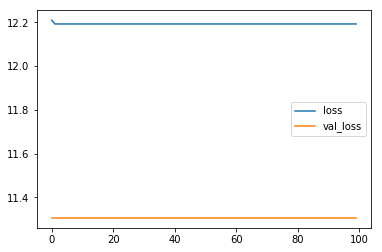

In [47]:
training_epochs = 100
# Need help on fixing the training. The losses aren't changing as the learning rate goes up. Really weird. 
rmsprop = RMSprop(lr=1000, rho=0.9, epsilon=None, decay=0.01)
model.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=1, nb_epoch=training_epochs, verbose=1, validation_data=(X_test, y_test),  callbacks=[plot_losses],)

# Test The Model

First cell is used to execute and find the highest probability in the predicted result. This is indicated by the np.argmax(result) and then the GROUND TRUTH is found using the similar approach. The second snipet of code is just outputting the final classification of the credit card type 

In [17]:
#The person we wish to check. 
test_subject = 1

test_value = X_test [test_subject-1:test_subject, :]
result = model.predict(test_value)
print(result)
num = np.argmax(result)
real = np.argmax(y_test[test_subject-1:test_subject, :])
print(y_test[test_subject-1:test_subject, :])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [18]:
print("Model Prediction")
if num ==0:
    print("Predicted: American Express Cobalt")
elif num ==1:
    print("Predicted: American Express Essential")
elif num ==2:
    print("Predicted: American Express Marriot Bonvoy")
elif num ==3:
    print("Predicted: American Express Simply Cash")
elif num ==4:
    print("Predicted: American Express Simply Cash Preferred")
elif num ==5:
    print("Predicted: Meridian Visa Infinite")
elif num ==6:
    print("Predicted: PC Financial Mastercard")
elif num ==7:
    print("Predicted: Scotiabank Momentum No-Fee Visa")
elif num ==8:
    print("Predicted: Scotiabank Momentum Visa Infinite")
elif num ==9:
    print("Predicted: Scotiabank SCENE Visa")
elif num ==10:
    print("Predicted: True Line Gold Mastercard")
elif num ==11:
    print("Predicted: True Line Mastercard")
elif num ==12:
    print("Predicted: American Express Blue Sky")
elif num ==13:
    print("Predicted: Not Enough")

print()
    
print("Ground Truth: ")
num = real
if num ==0:
    print("Predicted: American Express Cobalt")
elif num ==1:
    print("Predicted: American Express Essential")
elif num ==2:
    print("Predicted: American Express Marriot Bonvoy")
elif num ==3:
    print("Predicted: American Express Simply Cash")
elif num ==4:
    print("Predicted: American Express Simply Cash Preferred")
elif num ==5:
    print("Predicted: Meridian Visa Infinite")
elif num ==6:
    print("Predicted: PC Financial Mastercard")
elif num ==7:
    print("Predicted: Scotiabank Momentum No-Fee Visa")
elif num ==8:
    print("Predicted: Scotiabank Momentum Visa Infinite")
elif num ==9:
    print("Predicted: Scotiabank SCENE Visa")
elif num ==10:
    print("Predicted: True Line Gold Mastercard")
elif num ==11:
    print("Predicted: True Line Mastercard")
elif num ==12:
    print("Predicted: American Express Blue Sky")
elif num ==13:
    print("Predicted: Not Enough")

Model Prediction
Predicted: American Express Cobalt

Ground Truth: 
Predicted: American Express Cobalt
